In [30]:
from sklearn.svm import SVR, SVC
import pandas as pd
from sklearn.model_selection import train_test_split
#for visualization
import matplotlib.pyplot as plt

In [31]:
boston= pd.read_csv('housingD.xls')

boston.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [32]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [34]:
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

check for missing values in the columns

In [35]:
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [36]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Code below shows distribution of data in different columns to determine whether it is skewed or normailzed

In [37]:
cont_data=boston.select_dtypes(exclude='object')

def plothisto(cont_data):
    plt.figure(figsize=(20,20))
    for i, col in enumerate(cont_data.columns):
        plt.subplot(4,4,i+1)
        plt.hist(boston[col])
        plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

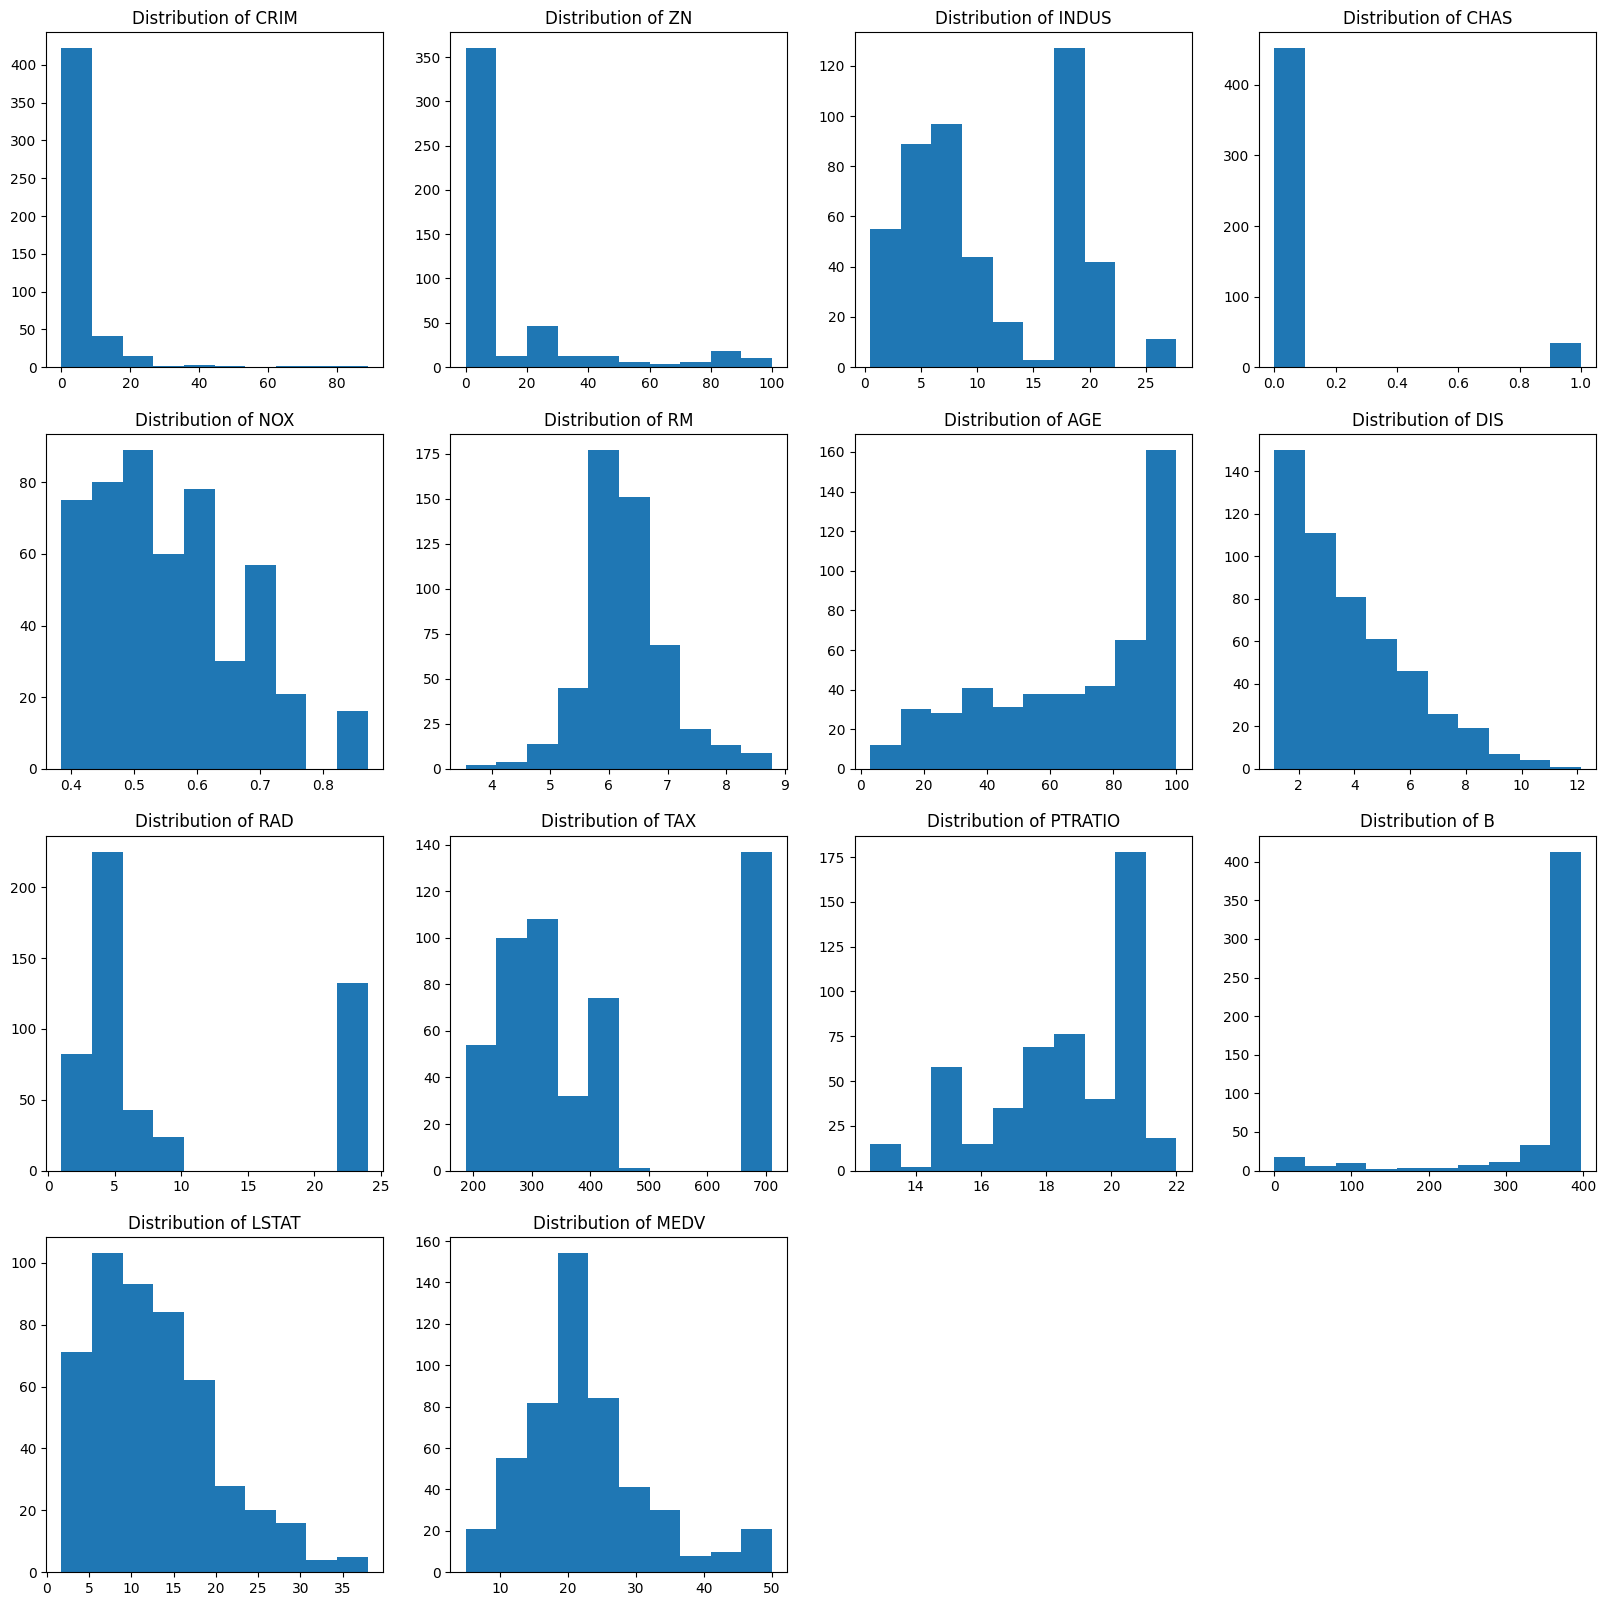

In [38]:
plothisto(cont_data)

here we decide to replace missing values with median with the numerical data 

In [39]:
boston["CRIM"]=boston["CRIM"].fillna(boston["CRIM"].median())
boston["ZN"]=boston["ZN"].fillna(boston["ZN"].median())
boston["INDUS"]=boston["INDUS"].fillna(boston["INDUS"].median())
boston["CHAS"]=boston["CHAS"].fillna(boston["CHAS"].median())
boston["AGE"]=boston["AGE"].fillna(boston["AGE"].median())
boston["LSTAT"]=boston["LSTAT"].fillna(boston["LSTAT"].median())

In [40]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


below we learn hpw tp drop a column

In [47]:
boston=boston.drop(columns=['LSTAT'])

In [48]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [49]:
X = boston[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B']] #predictor
y = boston['MEDV']

In [50]:
X_train,  X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
model = SVR()
#fit the model
# model.fit(X_train, y_train)

In [52]:
model.fit(X_train, y_train)

SVR()

In [53]:
y_pred=model.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f"Means squared error: {mse}\n R_squared:: {r2}")

Means squared error: 53.25457476479555
 R_squared:: 0.2738057076863206
